## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Understanding what the dataset looks like
df = pd.read_csv("forestfires.csv")
df.head(2)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0


* Area is the target variable here

## Data Visualization and Exploration

In [3]:
# Shape of the data
df.shape

(517, 13)

In [4]:
# To understand the categorical and numerical variables in the dataset
df.info()

dfa = df.drop(columns='area')
cat_columns = dfa.select_dtypes(include='object').columns.tolist()
num_columns = dfa.select_dtypes(exclude='object').columns.tolist()

print("Categorical varibales: ", cat_columns)
print("Numerical variables: ", num_columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    int64  
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(8), int64(3), object(2)
memory usage: 52.6+ KB
Categorical varibales:  ['month', 'day']
Numerical variables:  ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain']


In [5]:
# Total null values in the dataset
df.isna().sum()

X        0
Y        0
month    0
day      0
FFMC     0
DMC      0
DC       0
ISI      0
temp     0
RH       0
wind     0
rain     0
area     0
dtype: int64

* On class Imbalance: There are no missing value in the dataset

In [6]:
# Describing the data, To get all the stats of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
X,517.0,4.669246,2.313778,1.0,3.0,4.00,7.00,9.00
Y,517.0,4.299807,1.229900,2.0,4.0,4.00,5.00,9.00
FFMC,517.0,90.644681,5.520111,18.7,90.2,91.60,92.90,96.20
DMC,517.0,110.872340,64.046482,1.1,68.6,108.30,142.40,291.30
DC,517.0,547.940039,248.066192,7.9,437.7,664.20,713.90,860.60
ISI,517.0,9.021663,4.559477,0.0,6.5,8.40,10.80,56.10
temp,517.0,18.889168,5.806625,2.2,15.5,19.30,22.80,33.30
RH,517.0,44.288201,16.317469,15.0,33.0,42.00,53.00,100.00
wind,517.0,4.017602,1.791653,0.4,2.7,4.00,4.90,9.40
rain,517.0,0.021663,0.295959,0.0,0.0,0.00,0.00,6.40


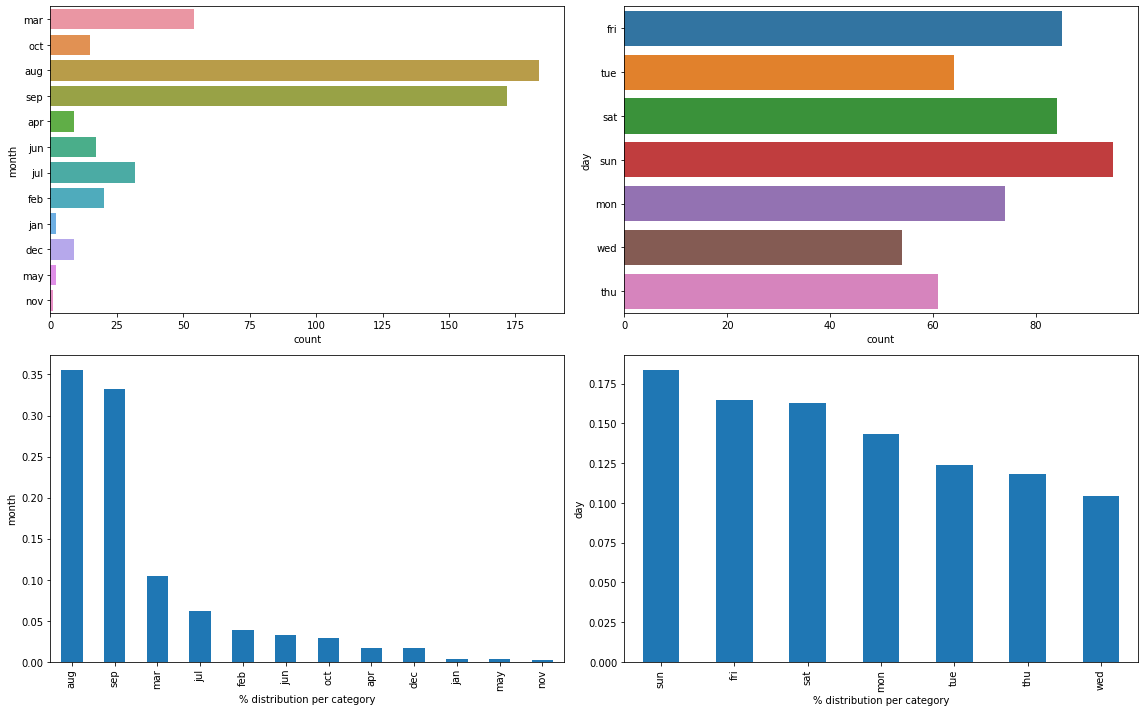

In [7]:
# analyzing categorical columns
plt.figure(figsize=(16,10))
for i,col in enumerate(cat_columns,1):
    plt.subplot(2,2,i)
    sns.countplot(data=dfa,y=col)
    plt.subplot(2,2,i+2)
    df[col].value_counts(normalize=True).plot.bar()
    plt.ylabel(col)
    plt.xlabel('% distribution per category')
plt.tight_layout()
plt.show()    

* high number of the forest fires occur in the month of August and September

array([[<Axes: title={'center': 'X'}>, <Axes: title={'center': 'Y'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>],
       [<Axes: title={'center': 'temp'}>, <Axes: title={'center': 'RH'}>,
        <Axes: title={'center': 'wind'}>],
       [<Axes: title={'center': 'rain'}>,
        <Axes: title={'center': 'area'}>, <Axes: >]], dtype=object)

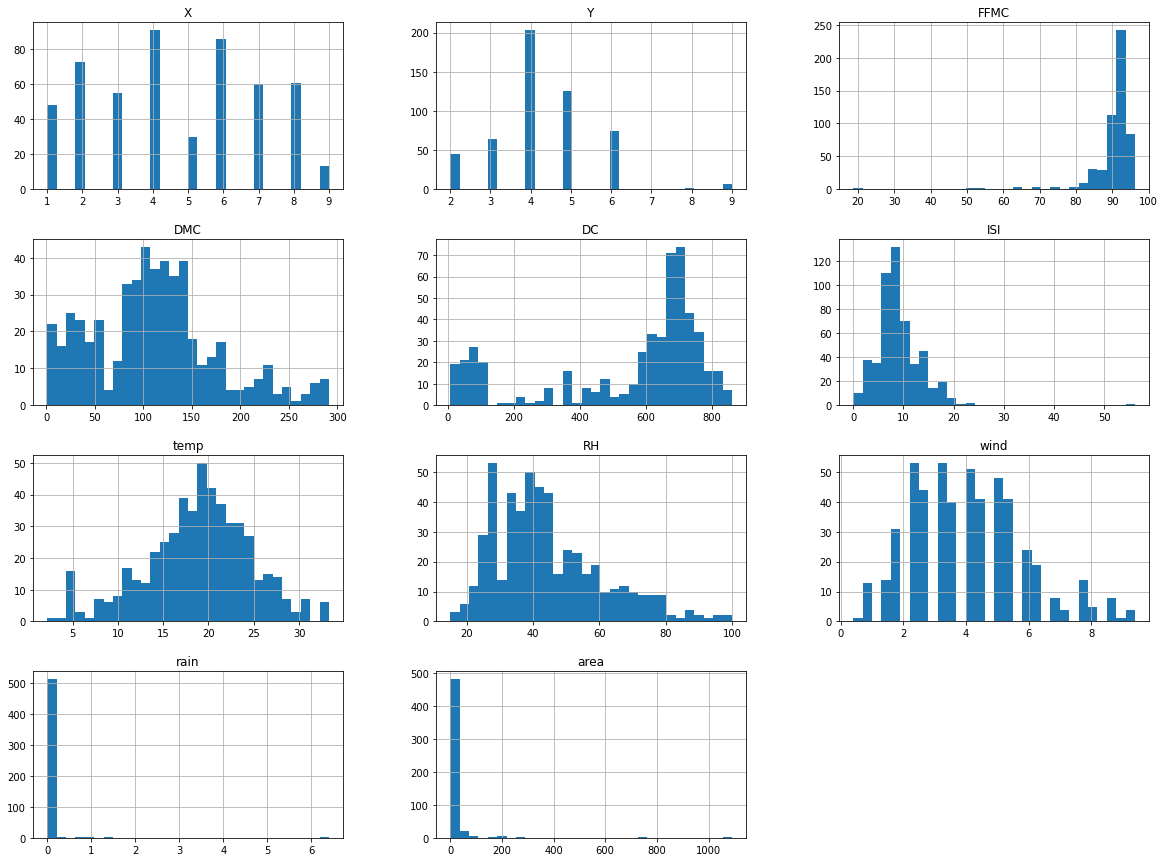

In [8]:
df.hist(bins=30, figsize=(20,15))

* Our Target variable "Area" is highly skewed
* Rain variable too is very skewed
* Other variables are still better distributed

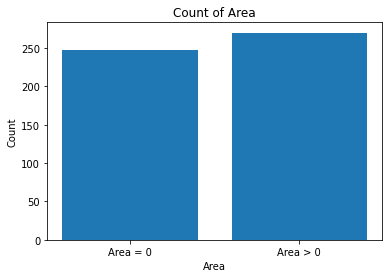

In [9]:
area_counts = df['area'].value_counts()

# Extract the count where area is 0 and where area is greater than 0
zero_count = area_counts[0]
nonzero_count = area_counts[area_counts.index > 0].sum()

# Create a bar plot with two bars
plt.figure()
plt.bar(['Area = 0', 'Area > 0'], [zero_count, nonzero_count])
plt.xlabel('Area')
plt.ylabel('Count')
plt.title('Count of Area')
plt.show()

* Area 0 and Area greater than 0, almost have the same count in the dataset

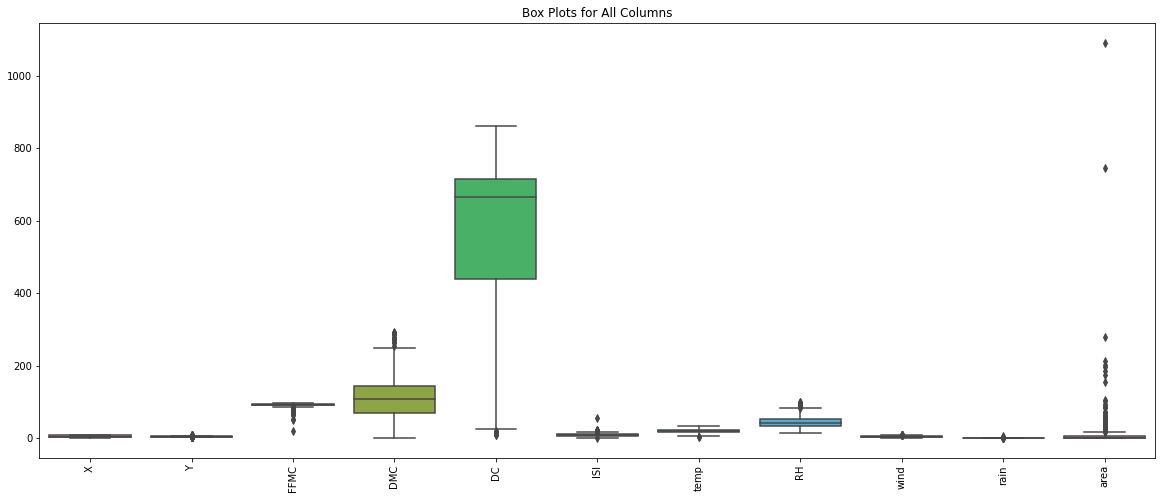

In [10]:
# making box plot for all the columns: This is to get better information about the outliers
plt.figure(figsize=(20, 8))
sns.boxplot(data=df)
plt.title('Box Plots for All Columns')
plt.xticks(rotation=90)
plt.show()

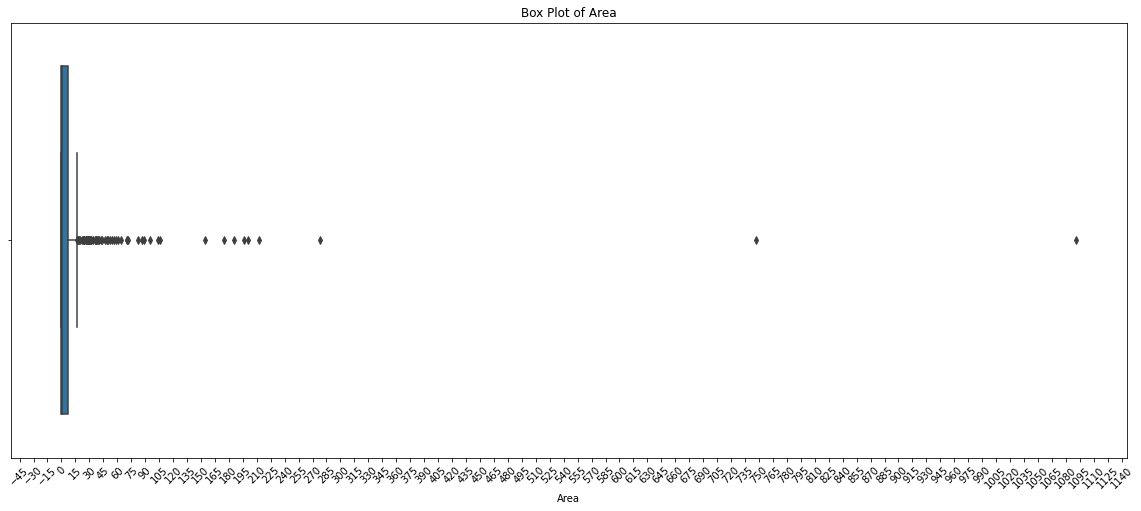

In [11]:
# This is to dig deep into the area variable
plt.figure(figsize=(20, 8))
sns.boxplot(x=df['area'])
plt.title('Box Plot of Area')
plt.xlabel('Area')

# Adjust the tick frequency on the x-axis
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(100))
plt.show()

* This makes sure that area has many outliers

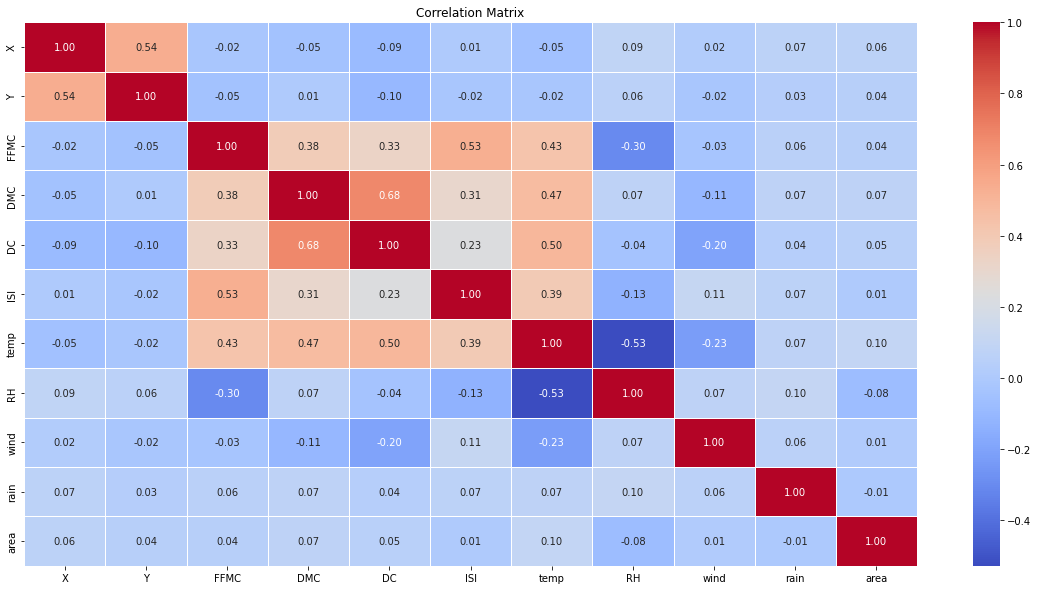

In [12]:
# Getting correlation of the data
correlation_matrix = df.corr(method='pearson')

plt.figure(figsize=(20, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

* Area and temp are a bit correlated, It makes sense too as high the temp more likely to have a forest fire.
* Temperature is negatively correlated to RH, which I guess is the humidity
* Temperature is also related to FFMC, DMC, DC and ISI
* There are other correlations too but not to severe.

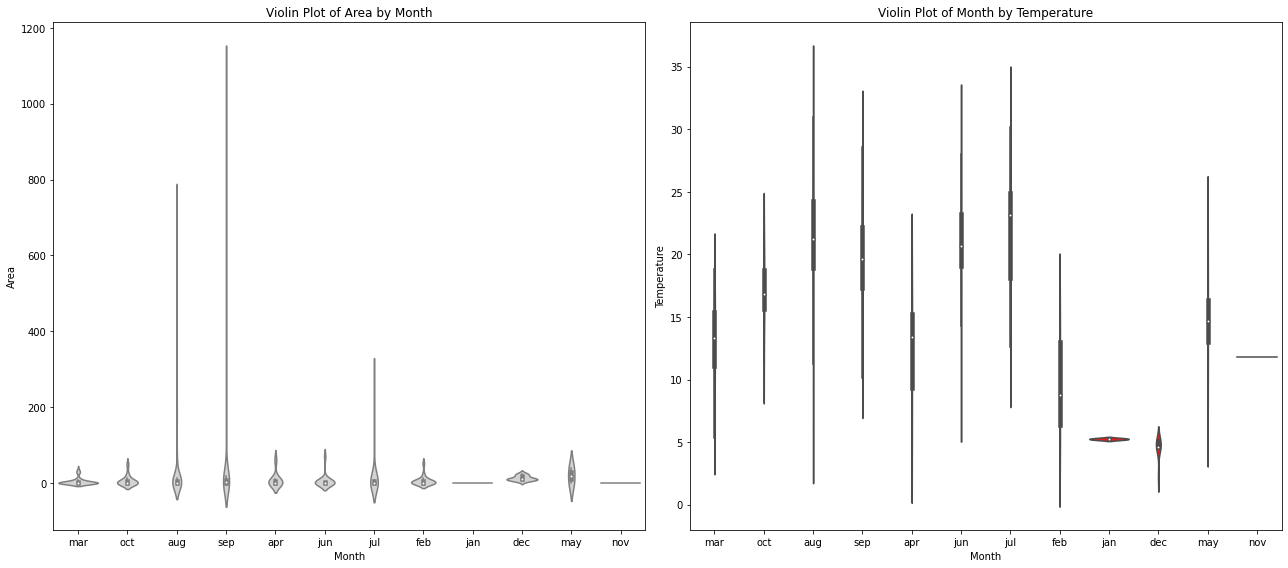

In [13]:
plt.figure(figsize=(18, 8))

# Plot for Area vs Month
plt.subplot(1, 2, 1)
sns.violinplot(x='month', y='area', data=df, color='lightgrey')
plt.title('Violin Plot of Area by Month')
plt.xlabel('Month')
plt.ylabel('Area')

# Plot for Month vs Temp
plt.subplot(1, 2, 2)
sns.violinplot(x='month', y='temp', data=df, color='red', jitter=0.4, size=4)
plt.title('Violin Plot of Month by Temperature')
plt.xlabel('Month')
plt.ylabel('Temperature')

plt.tight_layout()
plt.show()

* This analysis was to understand that in which month the most damage occured
* September has the highest damage and if see the temperature in that month that is very high, Same goes for August and July month too

## Data Pre-processing and cleaning

### Feature Engineering

* We won't be applying scaling to our target variable area as that becomes misleading. The target variable represents the quantity we are trying to predict or model, and scaling it may alter its original distribution and lose its inherent meaning

* We have applied Min Max Scaler to other features to get them in a range and help better for our predictions

In [14]:
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()

# Select the columns you want to normalize
columns_to_normalize = ['FFMC', 'DMC', 'DC', 'ISI']

# Apply normalization to the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

### Feature Selection

* Feature Selection:  We are dropping day from the column as we believe that it won't pay much importance in the predicting the area damage. Day is something which is bit of unpredictble when there would be a fire, but on the other hand months can be predictable. As for a given month we can tell if the temp would be hot or cold, we can't say the same for the days

* X and Y coordinates don't have any correlation with the Temp or the area, thus removing them too

In [15]:
# dropping day column from the dataframe
df = df.drop(['day'], axis=1)
df = df.drop(['X', 'Y'], axis=1)

### Pre-Processing Data

* For pre-processing the data, we need to convert categorical columns into the numerical column using one hot encoding as the data has to be in numerical form to be processed

In [16]:
# convert month column into one-hot incodings
columns_to_encode = ['month']

df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

df_encoded

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.870968,0.086492,0.101325,0.090909,8.2,51,6.7,0.0,0.00,0,0,0,0,0,0,1,0,0,0,0
1,0.927742,0.118194,0.775419,0.119430,18.0,33,0.9,0.0,0.00,0,0,0,0,0,0,0,0,0,1,0
2,0.927742,0.146795,0.796294,0.119430,14.6,33,1.3,0.0,0.00,0,0,0,0,0,0,0,0,0,1,0
3,0.941935,0.110958,0.081623,0.160428,8.3,97,4.0,0.2,0.00,0,0,0,0,0,0,1,0,0,0,0
4,0.910968,0.172984,0.110590,0.171123,11.4,99,1.8,0.0,0.00,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,27.8,32,2.7,0.0,6.44,1,0,0,0,0,0,0,0,0,0,0
513,0.811613,0.191592,0.771315,0.033868,21.9,71,5.8,0.0,54.29,1,0,0,0,0,0,0,0,0,0,0
514,0.811613,0.191592,0.771315,0.033868,21.2,70,6.7,0.0,11.16,1,0,0,0,0,0,0,0,0,0,0
515,0.976774,0.499311,0.711622,0.201426,25.6,42,4.0,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0


* From above plots we already know that there are no-missing values in the dataset
* There are outliers though, we need to fix that issue
* We will use three techniques to handle outliers, And do testing on both these techniques to check the result on which performs better

** Technique one: We will remove all the outliers

** Technique two: We will modify the values using Logarithmic transformation, as this converts our skewed curve into a better curve, making the data more symmetric and suitable for linear regression or other linear models.

** Technique three: We will modify the values using Square root transformation, same reason as the technique two (It can help in making the relationship more linear)

#### Technique One: Remove all the outliers

In [17]:
## From the above plot of area, We are considering anything above in the area "30" as the outlier

df_removed_outlier = df_encoded[df_encoded['area'] <= 30]
df_removed_outlier.reset_index(drop=True, inplace=True)

df_removed_outlier

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.870968,0.086492,0.101325,0.090909,8.2,51,6.7,0.0,0.00,0,0,0,0,0,0,1,0,0,0,0
1,0.927742,0.118194,0.775419,0.119430,18.0,33,0.9,0.0,0.00,0,0,0,0,0,0,0,0,0,1,0
2,0.927742,0.146795,0.796294,0.119430,14.6,33,1.3,0.0,0.00,0,0,0,0,0,0,0,0,0,1,0
3,0.941935,0.110958,0.081623,0.160428,8.3,97,4.0,0.2,0.00,0,0,0,0,0,0,1,0,0,0,0
4,0.910968,0.172984,0.110590,0.171123,11.4,99,1.8,0.0,0.00,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,0.811613,0.191592,0.771315,0.033868,27.8,35,2.7,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0
470,0.811613,0.191592,0.771315,0.033868,27.8,32,2.7,0.0,6.44,1,0,0,0,0,0,0,0,0,0,0
471,0.811613,0.191592,0.771315,0.033868,21.2,70,6.7,0.0,11.16,1,0,0,0,0,0,0,0,0,0,0
472,0.976774,0.499311,0.711622,0.201426,25.6,42,4.0,0.0,0.00,1,0,0,0,0,0,0,0,0,0,0


#### Technique two: Logarithmic Transformation

In [18]:
df_log_transformed = df_encoded.copy()
df_log_transformed['area'] = np.where(df_log_transformed['area'] > 0, np.log(df_log_transformed['area']), 0) 

df_log_transformed

/Users/geetanshkalra/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.870968,0.086492,0.101325,0.090909,8.2,51,6.7,0.0,0.000000,0,0,0,0,0,0,1,0,0,0,0
1,0.927742,0.118194,0.775419,0.119430,18.0,33,0.9,0.0,0.000000,0,0,0,0,0,0,0,0,0,1,0
2,0.927742,0.146795,0.796294,0.119430,14.6,33,1.3,0.0,0.000000,0,0,0,0,0,0,0,0,0,1,0
3,0.941935,0.110958,0.081623,0.160428,8.3,97,4.0,0.2,0.000000,0,0,0,0,0,0,1,0,0,0,0
4,0.910968,0.172984,0.110590,0.171123,11.4,99,1.8,0.0,0.000000,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,27.8,32,2.7,0.0,1.862529,1,0,0,0,0,0,0,0,0,0,0
513,0.811613,0.191592,0.771315,0.033868,21.9,71,5.8,0.0,3.994340,1,0,0,0,0,0,0,0,0,0,0
514,0.811613,0.191592,0.771315,0.033868,21.2,70,6.7,0.0,2.412336,1,0,0,0,0,0,0,0,0,0,0
515,0.976774,0.499311,0.711622,0.201426,25.6,42,4.0,0.0,0.000000,1,0,0,0,0,0,0,0,0,0,0


#### Technique Three: Square Root Transformation

In [19]:
df_square_transformed = df_encoded.copy()

df_square_transformed['area'] = np.sqrt(df_square_transformed['area'])

df_square_transformed

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.870968,0.086492,0.101325,0.090909,8.2,51,6.7,0.0,0.000000,0,0,0,0,0,0,1,0,0,0,0
1,0.927742,0.118194,0.775419,0.119430,18.0,33,0.9,0.0,0.000000,0,0,0,0,0,0,0,0,0,1,0
2,0.927742,0.146795,0.796294,0.119430,14.6,33,1.3,0.0,0.000000,0,0,0,0,0,0,0,0,0,1,0
3,0.941935,0.110958,0.081623,0.160428,8.3,97,4.0,0.2,0.000000,0,0,0,0,0,0,1,0,0,0,0
4,0.910968,0.172984,0.110590,0.171123,11.4,99,1.8,0.0,0.000000,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,0.811613,0.191592,0.771315,0.033868,27.8,32,2.7,0.0,2.537716,1,0,0,0,0,0,0,0,0,0,0
513,0.811613,0.191592,0.771315,0.033868,21.9,71,5.8,0.0,7.368175,1,0,0,0,0,0,0,0,0,0,0
514,0.811613,0.191592,0.771315,0.033868,21.2,70,6.7,0.0,3.340659,1,0,0,0,0,0,0,0,0,0,0
515,0.976774,0.499311,0.711622,0.201426,25.6,42,4.0,0.0,0.000000,1,0,0,0,0,0,0,0,0,0,0


## Model Building

In [20]:
def split_data(dataframe, test_size):
    # splitting data into train and test

    X = dataframe.drop(['area'], axis=1)
    y = dataframe['area']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)
    
    print("Results for test size: ", test_size*100, 'percent')
    return X, y, X_train, X_test, y_train, y_test

* With a single train-test split, the model's performance may be highly dependent on the particular random partitioning of the data. K-fold cross-validation mitigates this by averaging the model's performance over multiple train-test splits. This provides a more robust and reliable estimate of how well the model generalizes to unseen data.

In [21]:
def k_fold_validation(X, y):
    # Define the number of folds (k)
    k = 5

    # Create the k-fold cross-validation object
    kf = KFold(n_splits=k, shuffle=True, random_state=42)

    # Create our model
    model = LinearRegression()

    # Perform k-fold cross-validation
    scores = cross_val_score(model, X, y, cv=kf)

    print("Cross-validation scores:", scores)
    print("Mean CV score:", scores.mean())

In [22]:
def train_model_and_results(X_train, y_train, X_test, y_test):
    # Create the linear regression model
    model = LinearRegression()

    # Fit the model on the training data
    model.fit(X_train, y_train)

    # Predict on the training and testing data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model's performance on the training data
    train_mse = mean_squared_error(y_train, y_train_pred)
    train_rmse = mean_squared_error(y_train, y_train_pred, squared=False)
    train_mae = mean_absolute_error(y_train, y_train_pred)

    # Evaluate the model's performance on the testing data
    test_mse = mean_squared_error(y_test, y_test_pred)
    test_rmse = mean_squared_error(y_test, y_test_pred, squared=False)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    print("Training MSE:", train_mse)
    print("Testing MSE:", test_mse)

    print("Training RMSE:", round(train_rmse, 2))
    print("Testing RMSE:", round(test_rmse, 2))

    print("Training MAE:", train_mae)
    print("Testing MAE:", test_mae)

    return model

## Model Testing

* For Removed Outliers

In [23]:
for i in range(1, 10, 1):
    X, y, X_train, X_test, y_train, y_test = split_data(df_removed_outlier, i/10)
    k_fold_validation(X, y)
    train_model_and_results(X_train, y_train, X_test, y_test)
    print('*' * 100)

Results for test size:  10.0 percent
Cross-validation scores: [-0.03573403 -0.07939753 -0.16442107  0.07179495 -0.11676162]
Mean CV score: -0.06490385900312938
Training MSE: 31.286456074249674
Testing MSE: 29.145231529596995
Training RMSE: 5.59
Testing RMSE: 5.4
Training MAE: 3.8081977797814504
Testing MAE: 3.9336485368669116
****************************************************************************************************
Results for test size:  20.0 percent
Cross-validation scores: [-0.03573403 -0.07939753 -0.16442107  0.07179495 -0.11676162]
Mean CV score: -0.06490385900312938
Training MSE: 30.45382767969084
Testing MSE: 33.9837818401833
Training RMSE: 5.52
Testing RMSE: 5.83
Training MAE: 3.7627512153471017
Testing MAE: 3.9375744090824476
****************************************************************************************************
Results for test size:  30.0 percent
Cross-validation scores: [-0.03573403 -0.07939753 -0.16442107  0.07179495 -0.11676162]
Mean CV score: -0.06

* For Log Transformation data

In [24]:
list_of_models = []
for i in range(1, 10, 1):
    X, y, X_train, X_test, y_train, y_test = split_data(df_log_transformed, i/10)
    k_fold_validation(X, y)
    model = train_model_and_results(X_train, y_train, X_test, y_test)
    print(100 * '*')
    list_of_models.append(model)

Results for test size:  10.0 percent
Cross-validation scores: [-0.03208829  0.02482887 -0.20608018  0.01180618 -0.07481932]
Mean CV score: -0.055270550018921005
Training MSE: 1.9015215954508067
Testing MSE: 2.3978919477943417
Training RMSE: 1.38
Testing RMSE: 1.55
Training MAE: 1.1061705933868473
Testing MAE: 1.2223497132068883
****************************************************************************************************
Results for test size:  20.0 percent
Cross-validation scores: [-0.03208829  0.02482887 -0.20608018  0.01180618 -0.07481932]
Mean CV score: -0.055270550018921005
Training MSE: 1.8694832211624
Testing MSE: 2.337493890427462
Training RMSE: 1.37
Testing RMSE: 1.53
Training MAE: 1.0963593694035347
Testing MAE: 1.1868808635894776
****************************************************************************************************
Results for test size:  30.0 percent
Cross-validation scores: [-0.03208829  0.02482887 -0.20608018  0.01180618 -0.07481932]
Mean CV score: -0.

* For Sqaure Transformed

In [25]:
for i in range(1, 10, 1):
    X, y, X_train, X_test, y_train, y_test = split_data(df_square_transformed, i/10)
    k_fold_validation(X, y)
    train_model_and_results(X_train, y_train, X_test, y_test)
    print('*' * 100)

Results for test size:  10.0 percent
Cross-validation scores: [ 0.01685238  0.026231   -0.17810242  0.00965539 -0.13541782]
Mean CV score: -0.052156293674360275
Training MSE: 7.697005850522172
Testing MSE: 22.182072191651905
Training RMSE: 2.77
Testing RMSE: 4.71
Training MAE: 1.8208662041569543
Testing MAE: 2.2791385921719933
****************************************************************************************************
Results for test size:  20.0 percent
Cross-validation scores: [ 0.01685238  0.026231   -0.17810242  0.00965539 -0.13541782]
Mean CV score: -0.052156293674360275
Training MSE: 7.623290050648754
Testing MSE: 15.43295263465354
Training RMSE: 2.76
Testing RMSE: 3.93
Training MAE: 1.7941549218249244
Testing MAE: 2.10575790456631
****************************************************************************************************
Results for test size:  30.0 percent
Cross-validation scores: [ 0.01685238  0.026231   -0.17810242  0.00965539 -0.13541782]
Mean CV score: -0.0

## Feature Importance

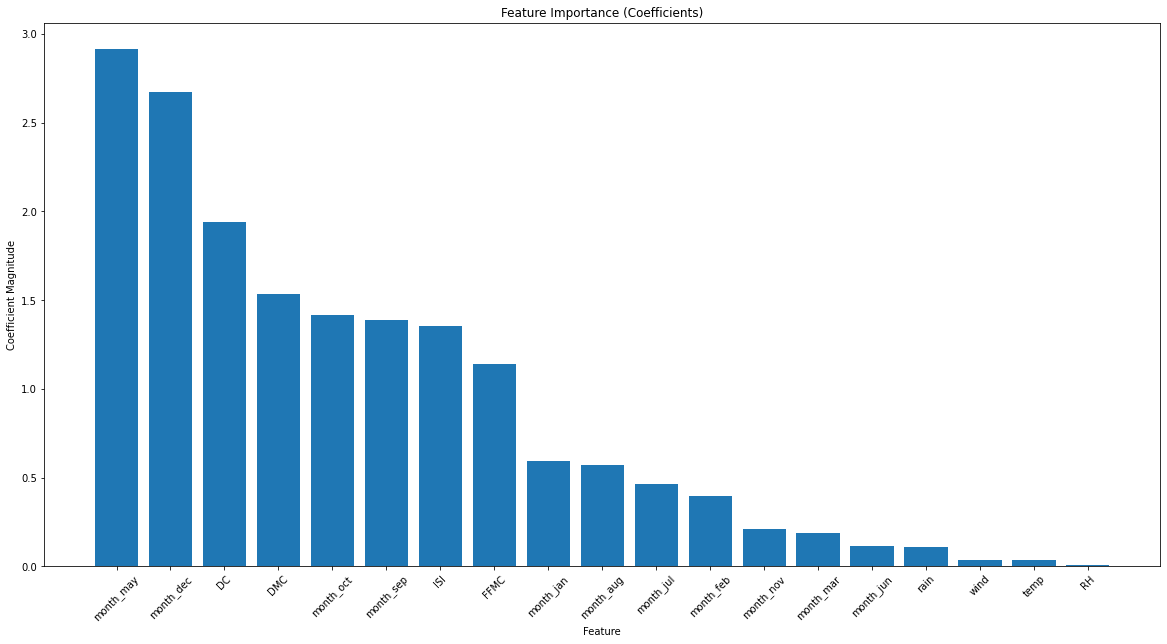

In [26]:
# Train - 70% and Test - 30% is the best suitated, so we will capture feature importance for that
feature_imp = list_of_models[2] 

feature_names = X_train.columns.tolist() 

# Retrieve feature coefficients
coefficients = feature_imp.coef_

# Sort feature coefficients in descending order
indices = np.argsort(np.abs(coefficients))[::-1]

# Plotting the feature importances (coefficients)
plt.figure(figsize=(20, 10))
plt.title("Feature Importance (Coefficients)")
plt.bar(range(X.shape[1]), np.abs(coefficients)[indices], align="center")
plt.xticks(range(X.shape[1]), [feature_names[i] for i in indices], rotation=45)
plt.xlabel("Feature")
plt.ylabel("Coefficient Magnitude")
plt.show()

## Performance Evaluation

* We have selected RMSE metric over others as it has a straightforward interpretation as it is in the same units as the target variable. It represents the average magnitude of the prediction errors, which makes it easier to understand. The lower the rmse, the better

* We think that Logarithmic Transformation is the best model for us. It gave the lowest RMSE. 

* We tried our model on various train and test distributions and we believe that train = 70% and test = 30% is the best fit, or just right fit for us. 

* Below this train and test distribution that we selected the model underfits and over it the model overfits

### Best Model: Logarithmic Transfomation with Train RMSE: 1.4 and Test RMSE: 1.42